In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 4-連結数

In [5]:
def merge4(img):
    H,W,C = img.shape
    tmp = np.zeros((H, W), dtype=np.int8)
    # 二値化
    tmp[img[..., 0] > 0] = 1

    out = np.zeros((H, W, 3), dtype=np.uint8)
    for y in range(H):
        for x in range(W):
            if tmp[y,x]<1:
                continue
        
            S = 0
            S += (tmp[y,min(x+1,W-1)] - tmp[y,min(x+1,W-1)] * tmp[max(y-1,0),min(x+1,W-1)] * tmp[max(y-1,0),x])
            S += (tmp[max(y-1,0),x] - tmp[max(y-1,0),x] * tmp[max(y-1,0),max(x-1,0)] * tmp[y,max(x-1,0)])
            S += (tmp[y,max(x-1,0)] - tmp[y,max(x-1,0)] * tmp[min(y+1,H-1),max(x-1,0)] * tmp[min(y+1,H-1),x])
            S += (tmp[min(y+1,H-1),x] - tmp[min(y+1,H-1),x] * tmp[min(y+1,H-1),min(x+1,W-1)] * tmp[y,min(x+1,W-1)])
        
            if S == 0:
                out[y,x] = [0, 0, 255]
            elif S == 1:
                out[y,x] = [0, 255, 0]
            elif S == 2:
                out[y,x] = [255, 0, 0]
            elif S == 3:
                out[y,x] = [255, 255, 0]
            elif S == 4:
                out[y,x] = [255, 0, 255]
                    
    out = out.astype(np.uint8)
    return out

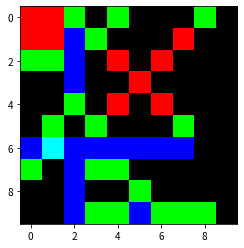

In [6]:
img = cv2.imread("./img/renketsu.png")

out = merge4(img)

plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

# 細線化処理

In [9]:
def thinning(img):
    H,W,C = img.shape
    out = np.zeros((H,W),dtype=np.int8)
    # 画像を0or1で表す
    out[img[...,0]>0]=1

    cnt=1
    while(cnt>0):
        cnt = 0
        tmp = out.copy()
        for y in range(H):
            for x in range(W):
                if out[y,x]<1:
                    continue
            
                c = tmp[max(y-1,0),x]+tmp[y,max(x-1,0)]+tmp[y,min(x+1,W-1)]+tmp[min(y+1,H-1),x]
                # 4連結数
                S = 0
                S += (tmp[y,min(x+1,W-1)] - tmp[y,min(x+1,W-1)] * tmp[max(y-1,0),min(x+1,W-1)] * tmp[max(y-1,0),x])
                S += (tmp[max(y-1,0),x] - tmp[max(y-1,0),x] * tmp[max(y-1,0),max(x-1,0)] * tmp[y,max(x-1,0)])
                S += (tmp[y,max(x-1,0)] - tmp[y,max(x-1,0)] * tmp[min(y+1,H-1),max(x-1,0)] * tmp[min(y+1,H-1),x])
                S += (tmp[min(y+1,H-1),x] - tmp[min(y+1,H-1),x] * tmp[min(y+1,H-1),min(x+1,W-1)] * tmp[y,min(x+1,W-1)])
            
                v = np.sum(tmp[max(y-1, 0) : min(y+2, H), max(x-1, 0) : min(x+2, W)])
            
                # 条件(1)
                if c<4:
                    # 条件(2)
                    if S==1:
                        # 条件(3)
                            if v>=4:
                                out[y,x]=0
                                cnt+=1

    out = out.astype(np.uint8) * 255
    return out

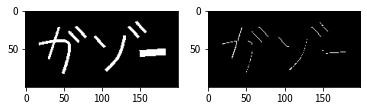

In [10]:
img = cv2.imread("./img/gazo.png")
out = thinning(img)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

# ヒルディッチの細線化

In [13]:
def hilditch_thinning(img):
    H,W,C = img.shape
    out = np.zeros((H,W),dtype=np.int8)
    # 画像を0or1で表す
    out[img[...,0]>0]=1

    cnt=1
    while(cnt>0):
        cnt = 0
        tmp = out.copy()
        for y in range(H):
            for x in range(W):
                judge=0
                if out[y,x]<1:
                    continue
                
                # 4近傍の1の数をカウント
                v = tmp[max(y-1,0),x]+tmp[y,max(x-1,0)]+tmp[y,min(x+1,W-1)]+tmp[min(y+1,H-1),x]
                
                # 8連結数
                S = 0
                S += (tmp[y,min(x+1,W-1)] - tmp[y,min(x+1,W-1)] * tmp[max(y-1,0),min(x+1,W-1)] * tmp[max(y-1,0),x])
                S += (tmp[max(y-1,0),x] - tmp[max(y-1,0),x] * tmp[max(y-1,0),max(x-1,0)] * tmp[y,max(x-1,0)])
                S += (tmp[y,max(x-1,0)] - tmp[y,max(x-1,0)] * tmp[min(y+1,H-1),max(x-1,0)] * tmp[min(y+1,H-1),x])
                S += (tmp[min(y+1,H-1),x] - tmp[min(y+1,H-1),x] * tmp[min(y+1,H-1),min(x+1,W-1)] * tmp[y,min(x+1,W-1)])
                
                # x1~x8の絶対値の和
                t = np.sum(tmp[max(y-1, 0) : min(y+2, H), max(x-1, 0) : min(x+2, W)])
                
                # 8近傍の1の数をカウント
                u = np.sum(tmp[max(y-1, 0) : min(y+2, H), max(x-1, 0) : min(x+2, W)])
                
                _tmp2 = 1 - out

                c = 0
                c += (_tmp2[y, min(x+1, W-1)] - _tmp2[y, min(x+1, W-1)] * _tmp2[max(y-1, 0), min(x+1, W-1)] * _tmp2[max(y-1, 0), x])
                c += (_tmp2[max(y-1, 0), x] - _tmp2[max(y-1, 0), x] * (1 - tmp[max(y-1, 0), max(x-1, 0)]) * _tmp2[y, max(x-1, 0)])
                c += (_tmp2[y, max(x-1, 0)] - _tmp2[y, max(x-1, 0)] * _tmp2[min(y+1, H-1), max(x-1, 0)] * _tmp2[min(y+1, H-1), x])
                c += (_tmp2[min(y+1, H-1), x] - _tmp2[min(y+1, H-1), x] * _tmp2[min(y+1, H-1), min(x+1, W-1)] * _tmp2[y, min(x+1, W-1)])
                if c == 1 or (out[max(y-1, 0), max(x-1,0 )] != tmp[max(y-1, 0), max(x-1, 0)]):
                    judge += 1

                c = 0
                c += (_tmp2[y, min(x+1, W-1)] - _tmp2[y, min(x+1, W-1)] * _tmp2[max(y-1, 0), min(x+1, W-1)] * (1 - tmp[max(y-1, 0), x]))
                c += ((1-tmp[max(y-1, 0), x]) - (1 - tmp[max(y-1, 0), x]) * _tmp2[max(y-1, 0), max(x-1, 0)] * _tmp2[y, max(x-1, 0)])
                c += (_tmp2[y, max(x-1,0 )] - _tmp2[y, max(x-1,0 )] * _tmp2[min(y+1, H-1), max(x-1, 0)] * _tmp2[min(y+1, H-1), x])
                c += (_tmp2[min(y+1, H-1), x] - _tmp2[min(y+1, H-1), x] * _tmp2[min(y+1, H-1), min(x+1, W-1)] * _tmp2[y, min(x+1, W-1)])
                if c == 1 or (out[max(y-1, 0), x] != tmp[max(y-1, 0), x]):
                    judge += 1

                c = 0
                c += (_tmp2[y, min(x+1, W-1)] - _tmp2[y, min(x+1, W-1)] * (1 - tmp[max(y-1, 0), min(x+1, W-1)]) * _tmp2[max(y-1, 0), x])
                c += (_tmp2[max(y-1, 0), x] - _tmp2[max(y-1, 0), x] * _tmp2[max(y-1, 0), max(x-1, 0)] * _tmp2[y, max(x-1, 0)])
                c += (_tmp2[y, max(x-1, 0)] - _tmp2[y, max(x-1, 0)] * _tmp2[min(y+1, H-1), max(x-1, 0)] * _tmp2[min(y+1, H-1), x])
                c += (_tmp2[min(y+1, H-1), x] - _tmp2[min(y+1, H-1), x] * _tmp2[min(y+1, H-1), min(x+1, W-1)] * _tmp2[y, min(x+1, W-1)])
                if c == 1 or (out[max(y-1, 0), min(x+1, W-1)] != tmp[max(y-1, 0), min(x+1, W-1)]):
                    judge += 1

                c = 0
                c += (_tmp2[y, min(x+1, W-1)] - _tmp2[y, min(x+1, W-1)] * _tmp2[max(y-1, 0), min(x+1, W-1)] * _tmp2[max(y-1, 0), x])
                c += (_tmp2[max(y-1, 0), x] - _tmp2[max(y-1, 0), x] * _tmp2[max(y-1, 0), max(x-1, 0)] * (1 - tmp[y, max(x-1, 0)]))
                c += ((1 - tmp[y, max(x-1, 0)]) - (1 - tmp[y, max(x-1, 0)]) * _tmp2[min(y+1, H-1), max(x-1, 0)] * _tmp2[min(y+1, H-1), x])
                c += (_tmp2[min(y+1, H-1), x] - _tmp2[min(y+1, H-1), x] * _tmp2[min(y+1, H-1), min(x+1, W-1)] * _tmp2[y, min(x+1, W-1)])
                if c == 1 or (out[y, max(x-1, 0)] != tmp[y, max(x-1, 0)]):
                    judge += 1
                        
                if v<4:
                    judge+=1
                if S==1:
                    judge+=1
                if t>=3:
                    judge+=1
                if u>=2:
                    judge+=1
                    
                if judge >= 8:
                    out[y, x] = 0
                    cnt += 1

    out = out.astype(np.uint8) * 255
    return out

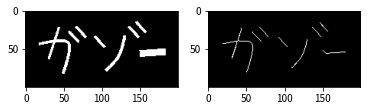

In [14]:
img = cv2.imread("./img/gazo.png")
out = hilditch_thinning(img)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()